# nmi | spring 2024
## lecture 17 : shooting method


## 7 boundary value problems


ie, a boundary value problem (BVP) is a DE with constraints specified at both ends of a solution interval.
</br>


### 7.1 shooting method


convert BVP to IVP. ie, calculate missing initial values. ie, $y_a,y_b \rightarrow y',y_a$.
</br>



#### 7.1.1 solutions of boundary value problems


general order two BVP on interval $a\le t\le b$
</br></br>

\begin{align}
  \textrm{BVP} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = f(t,y,y')\\
      y(a) = y_a \\
      y(b) = y_b.
    \end{array}
  \right.
\end{align}
</br>


##### example 01


find the max height of a projectile tossed from a $30m$ building that takes $4s$ to hit the ground.
</br></br>

\begin{align}
  \textrm{example 01 BVP} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = -g \\
      y(0) = 30 \\
      y(4) = 0
    \end{array}
  \right.
\end{align}
</br>


\begin{align}
  \textrm{aka IVP} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = -g  \\
      y(0) = 30 \\
      y'(0) = v_0 = ?
    \end{array}
  \right.
\end{align}
</br>

for unknown initial velocity $v_0$, integrate BVP twice.
</br></br>

\begin{align}
  y'' &= -g \\
  \\
  &\rightarrow y' = -gt + c_1 = -gt + v_0 \\
  &\rightarrow y = -\frac{1}{2}gt^2 + v_0t + c_2 = -\frac{1}{2}gt^2 + v_0t + y_0 \\
  \\
  &\Downarrow \\
  \\
  y(t) &= -\frac{1}{2}gt^2 + v_0t+y_0 \\
  \\
  &\Downarrow \\
  \\
  30 &= y(0) = -\frac{1}{2}g\cdot(0)^2 + v_0\cdot(0) + y_0 \quad\rightarrow\quad y_0 = 30 \\
  0 &=y(4) = -\frac{1}{2}g\cdot(4)^2 + v_0\cdot(4) + 30 = -8g + 4v_0 + 30 = 0 \quad\rightarrow\quad v_0 = \frac{8g-30}{4}
  \\
  &\Downarrow \\
  \\
  v_0 &\approx 12.12 \text{ }m/s \\
  \\
  &\Downarrow \\
  \\
  y(t) &= -\frac{1}{2}gt^2 + 12.12 t + 30 \\
  \\
  &\Downarrow \\
  \\
  v(t) &= y'(t) = -\frac{1}{2}(2)gt + 12.12 = -gt + 12.12 \\
  \\
  &\Downarrow \\
  \\
  v(t_{y_{max}}) &= 0 ~ \text{ @ apex} \quad\rightarrow t_{y_{max}} = \frac{12.12}{g} \approx 1.236 \,s \\
  \\
  &\Downarrow \\
  \\
  y(t=t_{y_{max}}) &= -\frac{1}{2}g(t_{y_{max}})^2 + 12.12 (t_{y_{max}}) + 30
\end{align}
</br>


###### code


In [ ]:
# just bc
def main():
  g = 9.81 # m/s^2
  t_max = 12.12/g # solve for t when y' = 0 = -gt + v0
  y_max = -g/2*t_max*t_max + 12.12*t_max + 30
  print(f"if that ball dropped hit the ground after 4s then its trajectory was such that it peaked at {y_max:.4f} meters at {t_max:.4f} seconds.")

if __name__ == "__main__":
  main()


if that ball dropped hit the ground after 4s then its trajectory was such that it peaked at 37.4870 meters at 1.2355 seconds.


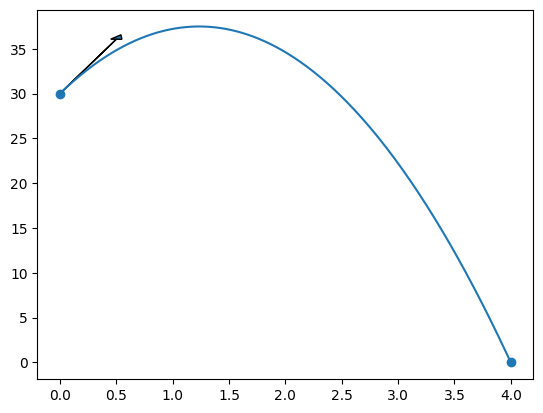

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def main():
  tt = [0,4]; h= 0.01
  yy = [30,0]
  v0 = (pow(tt[1],2)/2*sp.constants.g - yy[0])/tt[1]

  y = lambda t: -sp.constants.g*pow(t,2)/2 + v0*t + yy[0]

  ts = np.arange(tt[0],tt[1]+h,h)
  ys = y(ts)

  plt.scatter(tt,yy)
  plt.plot(ts,ys)

  θ = np.arctan(v0); dt = 0.5; dy = np.sin(θ)/np.cos(θ)*dt # arrow
  plt.arrow(tt[0],yy[0],dt,dy,head_width=0.1,head_length=.5)

  plt.show()

if __name__ == "__main__":
  main()


##### example 02


show that $y(t)= t sint$ is a solution of BVP
</br></br>

\begin{align}
  \textrm{example 02} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = -y + 2cost \\
      y(0) = 0 \\
      y(\pi) = 0.
    \end{array}
  \right.
\end{align}
</br>


\begin{align}
  \Rightarrow\quad y''(t) &= -t sint + 2cost \\
  \\
  &\quad\Downarrow \\
  \\
  y_o &= 0sin0 = 0 \\
  y(\pi) &= \pi sin\pi = 0. \quad\checkmark
\end{align}
</br>


###### code


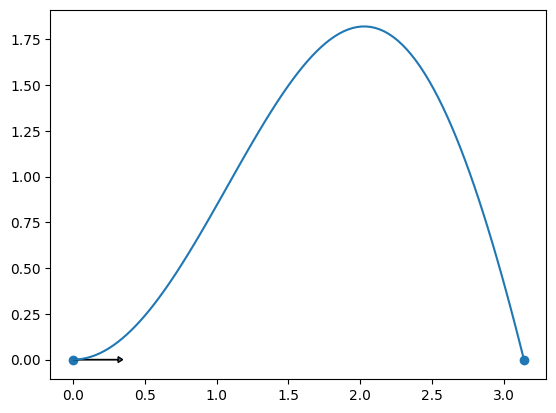

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def main():
  tt = [0,np.pi]
  yy = [0,0]
  v0 = lambda t: t*np.cos(t) + np.sin(t)

  y = lambda t: t*np.sin(t)

  n = 100
  ts = np.linspace(tt[0],tt[1],n+1)
  ys = y(ts)

  plt.scatter(tt,yy)
  plt.plot(ts,ys)

  scale = 10/n
  θ = np.arctan(v0(tt[0])); dt = (tt[1]-tt[0])*scale; dy = np.sin(θ)/np.cos(θ)*dt # arrow
  plt.arrow(tt[0],yy[0],dt,dy,head_width=dt*scale,head_length=dt*scale)

  plt.show()

if __name__ == "__main__":
  main()


##### usw


the existence and uniqueness theory for BVP is more complicated than for IVP bc BVPs may have no solutions or infinitely many. consider that IVP necessitates initial position and rate of change while BVP swaps out that rate for another terminal position.
</br>


##### example 03


show BVP has no solutions.
</br></br>

\begin{align}
  \textrm{example 03} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = -y \\
      y(0) = 0 \\
      y(\pi) = 1.
    \end{array}
  \right.
\end{align}
</br>


this DE has a 2d family of potential solutions generated by linearly idependent solutions $cost,sint$. ie, solutions must have the form $y(t) = acost + bsint$. however,
</br></br>

\begin{align}
  0 &= y(0) = a\,cos(0) + b\,sin(0) = a \\
  &\Rightarrow\, a = 0,\, y(t) = b sin t \\
  1 &= y(\pi) \ne b\,sin(\pi) = 0 \equiv lol. \,\checkmark
\end{align}
</br>


##### example 04


show BVP has infinitely many solutions.
</br></br>

\begin{align}
  \textrm{example 04} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = -y \\
      y(0) = 0 \\
      y(\pi) = 0.
    \end{array}
  \right.
\end{align}
</br>


well. $y(t) = ksint$ works and for any $k \in \mathbb{R}$. $\quad\checkmark$
</br>


##### example 05


find all solutions for BVP.
</br></br>

\begin{align}
  \textrm{example 05} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = 4y \\
      y(0) = 1 \\
      y(1) = 3.
    \end{array}
  \right.
\end{align}
</br>


try linearly independent $y = e^{2t}, y = e^{-2t}$. from elementary differential equations theory, all solutions of DE are linear combinations as $y(t) = c_1e^{2t} + c_2e^{-2t}$ where $c_1,c_2$ are evaluated from bc
</br></br>

\begin{align}
  1 &= y(0) = c_1e^{2\cdot 0} + c_2e^{-2\cdot 0} = c_1 + c_2 \\
  3 &= y(1) = c_1e^{2\cdot 1} + c_2e^{-2\cdot 1} = c_1e^{2} + c_2e^{-2} \\
  \\
  &\quad\Downarrow \\
  \\
  y(t) &= \underbrace{\frac{3-e^{-2}}{e^2-e^{-2}}}_{c_1}e^{2t} + \underbrace{\frac{e^2-3}{e^2-e^{-2}}}_{c_2}e^{-2t}. \,\checkmark
\end{align}
</br>


#### 7.1.2 shooting method implementation


the shooting method solves BVP by finding an IVP that has the same solution. ie, a sequence of IVPs with an initial slope that converges to a solution that satisifies $y_a,y_b$.
</br></br>

formally, define $F(s)$ as the difference between $y_b$ and $y(b)$ where $y(t)$ solves IVP with $y(a) = y_a$ and $y'(a) = sb$. ie, solve $F(s) = 0$
</br>


$F(s)$ can be solved with something as frumpy as bisection. i mean, i did.
</br></br>

so $s_0,s_1$ such that $F(s_0) \cdot F(s_1) < 0$ bc then $s_0,s_1$ bracket the root $s^* \approx y'(a)$. then solve that IVP, which was so last week. ie,
</br></br>

\begin{align}
  \text{BVP} \rightarrow \text{IVP} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = f(t,y,y') \\
      y(a) = y_a \\
      y'(a) = s^*.
    \end{array}
  \right.
\end{align}
</br>



##### example 06


example 06 revisits example 05. apply shooting method to BVP
</br></br>

\begin{align}
  \text{example 06} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = 4y \\
      y(0) = 1 \\
      y(1) = 3.
    \end{array}
  \right.
\end{align}
</br>


true solution: $y(t) = \frac{3-e^{-2}}{e^2-e^{-2}}e^{2t} + \frac{e^2-3}{e^2-e^{-2}}e^{-2t}$.
</br></br>

rewrite as first order system,
</br></br>

\begin{align}
  \left.
    \begin{array}
      && y' = v \\
      & v' = 4y \\ \\ \\
    \end{array}
  \right.
  \left.
    \qquad
    \begin{array}
      && \\ \sim \\ \\ \\
    \end{array}
    \quad
  \right.
  \left.
    \begin{array}
      && y_1 = y \\
      & y_2 = y' \\
      & y_1' = y_2 \\
      & y_2' = 4y_1
    \end{array}
  \right.
\end{align}
</br>

set up $F(s)$ to solve for $s^*$.
</br>

```
# define F(s)
 def ydot(t,y):
  dy = np.zeros_like(y)
  dy[0] = y[1]
  dy[1] = 4*y[0]
  return rc

# solve F(s) for s*
some_ode_solver(ydot,[a,b],[1,s])
```


###### code


In [ ]:
# final form yet; gonna combine both codes cells bc they are nearly identical




example 06, iteration 16, s = [-0.420394897,-0.420379639]



,y_act,t1,y1,y1',t2,y2,y2'
0,1.00000000,0.00000000,1.00000000,-0.42039490,0.00000000,1.00000000,-0.42037964
1,0.98054520,0.06831938,0.98053904,-0.15019675,0.06831889,0.98054016,-0.15018328
2,1.19734190,0.43587026,1.19734501,1.38228821,0.43586716,1.19734824,1.38229479
3,2.48312684,0.89868139,2.48315471,4.56482847,0.89867893,2.48316585,4.56485132
4,3.00000000,1.00000000,2.99998464,5.67213021,1.00000000,3.00001231,5.67218762


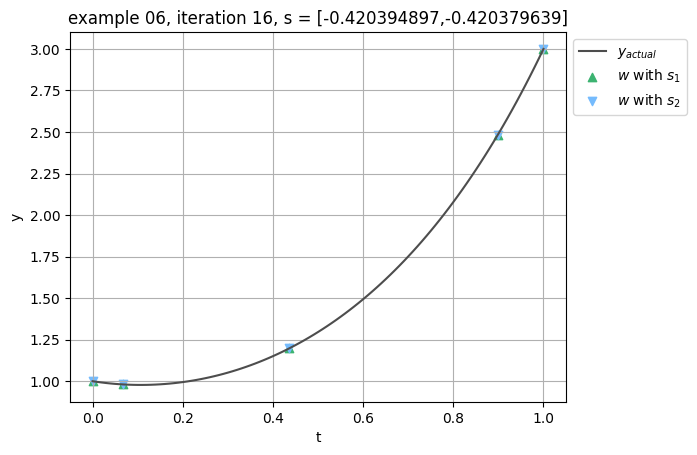

In [ ]:
# example 06

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

def main():

  # true solution
  c1 = (3-np.exp(-2))/(np.exp(2)-np.exp(-2))
  c2 = (np.exp(2)-3)/(np.exp(2)-np.exp(-2))
  yact = lambda t: c1*np.exp(2*t) + c2*np.exp(-2*t)
  mact = lambda t: 2*c1*np.exp(2*t) -2*c2*np.exp(-2*t)

  # bvp
  bv = [1,3]
  tt = [0,1]

  # ivp: f(t,y) = [y',y'']
  def ydot(t,y):
    dy = np.zeros_like(y)
    dy[0] = y[1] # y'
    dy[1] = 4*y[0]
    return dy

  ic = np.array([0,bv[1]]) # zero is placeholder for s* - ie, [s*,bv[0]]
  tol = 1e-5 # error bound

  # bisection sorry lol
  s1 = -0.5 # this is the  left endpoint "a" of the interval [a,b]
  s2 = +0.5 # this is the right endpoint "b" of the interval [a,b]
  imax = 20 # max attempts at finding s* within interval [s1,s2]
  i = 0
  while (abs((s2-s1)/2) > tol) and (i<imax):
    ic = [bv[0],s1]
    sol1 = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    ic = [bv[0],s2]
    sol2 = sp.integrate.solve_ivp(ydot,tt,ic)

    size1 = sol1.t.size
    size2 = sol2.t.size
    err1 = bv[1] - sol1.y[0][size1-1] # error at s1 ~ a
    err2 = bv[1] - sol2.y[0][size2-1] # error at s2 ~ b
    if err1*err2 > 0 :
      print(f"choose different s1,s2. perhaps near {mact(tt[0]):.4f} {bv[1]:.4f}.")
      break
    #err = abs(err2 - err1) # deciding on root s stabilty over f(s)

    sc = (s1+s2)/2 # midpoint between of [s1,s2] ~ [a,b]
    ic = [bv[0],sc]
    solc = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic)
    sizec = solc.t.size
    errc = bv[1] - solc.y[0][sizec-1] # error at c
    if err1*errc < 0 :
      s2 = sc
      sol2 = solc
    else:
      s1 = sc
      sol1 = solc

    i += 1

  # dataframe, save last brackets
  ds = np.empty((max(size1,size2),1+3*2))
  ds[:] = np.nan # matplotlib ignores nan = good
  if size1 > size2:
    ds[0:size1,0] = yact(sol1.t)
    cx = "t1"
  else:
    ds[0:size2,0] = yact(sol2.t)
    cx = "t2"
  ds[0:size1,1] = sol1.t
  ds[0:size1,2] = sol1.y[0]
  ds[0:size1,3] = sol1.y[1]
  ds[0:size2,4] = sol2.t
  ds[0:size2,5] = sol2.y[0]
  ds[0:size2,6] = sol2.y[1]

  # dataframe, print some
  s_title = "example 06, iteration " + str(i) + ", s = [" + "{:10.9f}".format(s1) +"," + "{:10.9f}".format(s2) + "]"
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",8)
  df = pd.DataFrame(data=ds,columns=["y_act","t1","y1","y1'","t2","y2","y2'"])
  if True: # spreadsheet
    display(df)
    print() # spacer

  # plot
  if True:
    ts = np.linspace(tt[0],tt[1],101)
    ys = yact(ts)
    plt.plot(ts,ys,label="$y_{actual}$",color="0.3")
    plt.scatter(ds[:,1],ds[:,2],label="$w$ with $s_1$",color="mediumseagreen",marker="^")
    plt.scatter(ds[:,4],ds[:,5],label="$w$ with $s_2$",color="xkcd:sky blue",marker="v")
    plt.title(s_title)
    plt.xlabel("t")
    plt.ylabel("y")
    plt.grid('on')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()




example 06, 1st iteration 1, s = [-0.500000000,0.000000000]



,y_act,t1,y1,y1',t2,y2,y2'
0,1.00000000,0.00000000,1.00000000,-0.50000000,0.00000000,1.00000000,0.00000000
1,0.99989515,0.07071131,0.97454323,-0.22121941,0.00024975,1.00000012,0.00099900
2,0.99886040,0.45089766,1.17771167,1.34064811,0.00274725,1.00001509,0.01098907
3,0.98987963,0.90984992,2.41519642,4.42486963,0.02772228,1.00153744,0.11094593
4,1.03527234,1.00000000,2.85562679,5.37263378,0.27747253,1.15797868,1.16773885
5,1.83772400,NaN,NaN,NaN,0.72893415,2.26486985,4.06399868
6,3.00000000,NaN,NaN,NaN,1.00000000,3.76231380,7.25379131


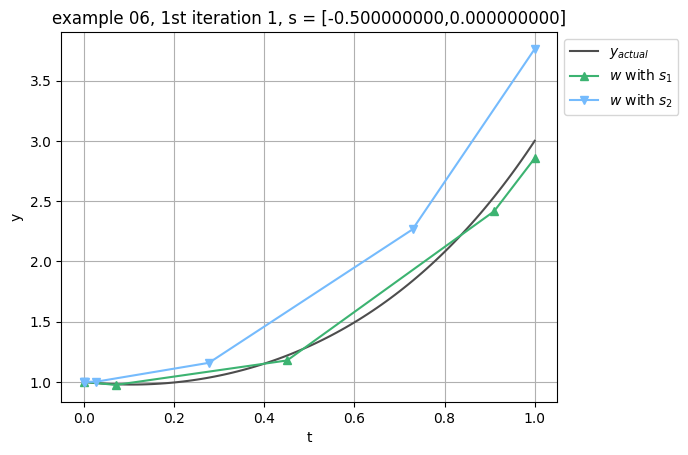

In [ ]:
# example 06, hack for first guesses at initial rate of change s*

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

def main():

  # true solution
  c1 = (3-np.exp(-2))/(np.exp(2)-np.exp(-2))
  c2 = (np.exp(2)-3)/(np.exp(2)-np.exp(-2))
  yact = lambda t: c1*np.exp(2*t) + c2*np.exp(-2*t)
  mact = lambda t: 2*c1*np.exp(2*t) -2*c2*np.exp(-2*t)

  # bvp
  bv = [1,3]
  tt = [0,1]

  # ivp: f(t,y) = [y',y'']
  def ydot(t,y):
    dy = np.zeros_like(y)
    dy[0] = y[1] # y'
    dy[1] = 4*y[0]
    return dy

  ic = np.array([0,bv[1]]) # zero is placeholder for s* - ie, [s*,bv[0]]
  tol = 1e-5 # error bound

  # bisection sorry lol
  s1 = -0.5 # this is the  left endpoint "a" of the interval [a,b]
  s2 = +0.5 # this is the right endpoint "b" of the interval [a,b]
  imax = 20 # max attempts at finding s* within interval [s1,s2]
  i = 0
  while True: #(abs((s2-s1)/2) > tol) and (i<imax):
    ic = [bv[0],s1]
    sol1 = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic,dense_output=True)
    ic = [bv[0],s2]
    sol2 = sp.integrate.solve_ivp(ydot,tt,ic,dense_output=True)

    size1 = sol1.t.size
    size2 = sol2.t.size
    err1 = bv[1] - sol1.y[0][size1-1] # error at s1 ~ a
    err2 = bv[1] - sol2.y[0][size2-1] # error at s2 ~ b
    if err1*err2 > 0 :
      print(f"choose different s1,s2. perhaps near {mact(tt[0]):.4f} {bv[1]:.4f}.")
      break
    #err = abs(err2 - err1) # deciding on root s stabilty over f(s)

    sc = (s1+s2)/2 # midpoint between of [s1,s2] ~ [a,b]
    ic = [bv[0],sc]
    solc = sp.integrate.solve_ivp(fun=ydot,t_span=tt,y0=ic,dense_output=True)
    sizec = solc.t.size
    errc = bv[1] - solc.y[0][sizec-1] # error at c
    if err1*errc < 0 :
      s2 = sc
      sol2 = solc
      size2 = sizec
    else:
      s1 = sc
      sol1 = solc
      size1 = sizec

    i += 1
    break # its that much of a hack!

  # dataframe, save last brackets
  ds = np.empty((max(size1,size2),1+3*2))
  ds[:] = np.nan # matplotlib ignores nan = good
  if size1 > size2:
    ds[0:size1,0] = yact(sol1.t)
    cx = "t1"
  else:
    ds[0:size2,0] = yact(sol2.t)
    cx = "t2"
  ds[0:size1,1] = sol1.t
  ds[0:size1,2] = sol1.y[0]
  ds[0:size1,3] = sol1.y[1]
  ds[0:size2,4] = sol2.t
  ds[0:size2,5] = sol2.y[0]
  ds[0:size2,6] = sol2.y[1]

  # dataframe, print some
  s_title = "example 06, 1st iteration " + str(i) + ", s = [" + "{:10.9f}".format(s1) +"," + "{:10.9f}".format(s2) + "]"
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",8)
  df = pd.DataFrame(data=ds,columns=["y_act","t1","y1","y1'","t2","y2","y2'"])
  if True: # spreadsheet
    display(df)
    print() # spacer

  # plot
  if True:
    ts = np.linspace(tt[0],tt[1],101)
    ys = yact(ts)
    plt.plot(ts,ys,label="$y_{actual}$",color="0.3")
    plt.plot(ds[:,1],ds[:,2],label="$w$ with $s_1$",color="mediumseagreen",marker="^")
    plt.plot(ds[:,4],ds[:,5],label="$w$ with $s_2$",color="xkcd:sky blue",marker="v")
    plt.title(s_title)
    plt.xlabel("t")
    plt.ylabel("y")
    plt.grid('on')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()


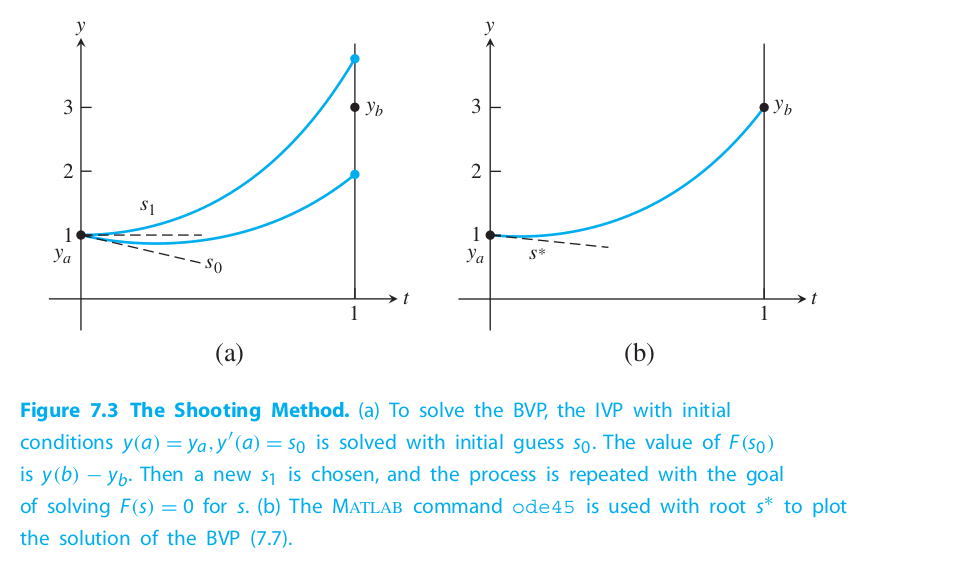

##### example 07


apply shooting method to BVP
</br></br>

\begin{align}
  \text{example 07} \quad
  \left\{ \quad
    \begin{array}{l}
      y_1' = \frac{4-2y_2}{t^3} \\
      y_2' = -e^{y_1} \\
      y_1(1) = 0 \\
      y_2(2) = 0 \\
      t \in [1,2].
    \end{array}
  \right.
\end{align}
</br>

if $y_2(1)$ were provided, this would be IVP. so apply shooting method to get $y_2(1)$ and then you can use IVP methodology.
</br>



true solution: $y_1(t) = ln\, t,\, y_2(t) = 2 - \frac{t^2}{2}$.
</br>


###### code


In [ ]:
# not soup yet
